<a href="https://colab.research.google.com/github/felipekbatista/data_science/blob/master/exercise_36_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import dos dados e bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = '/content/drive/My Drive/Colab Notebooks/image codes/exercise_36.csv'
dados = pd.read_csv(path)
dados.head()

,Unnamed: 0,0,1,2,3,4,5
0,0,labels,area,perimeter,major axis,minor axis,eqv diameter
1,1,1,12057066,54735.7112,4944.8175,3674.3981,3918.1033
2,2,2,2220,236.2254,85772,40.4931,53.1657
3,3,3,1478,149.7401,58.4509,32.3893,43.3803
4,4,4,1262,136.1838,46123,35.7796,40.0853


# Pré Tratamento dos dados - organização e renomeaçao

## drop column unnamed: 0

In [4]:
#drop column unnamed:0
dados.drop(columns = 'Unnamed: 0', inplace = True)
print(dados.head())

        0         1           2           3           4             5
0  labels      area   perimeter  major axis  minor axis  eqv diameter
1       1  12057066  54735.7112   4944.8175   3674.3981     3918.1033
2       2      2220    236.2254       85772     40.4931       53.1657
3       3      1478    149.7401     58.4509     32.3893       43.3803
4       4      1262    136.1838       46123     35.7796       40.0853


## rename columns 

In [5]:
#column rename
coluna = dados.columns
print(coluna)

nova_coluna = ['labels', 'area', 'perimeter', 'mahor_axis',	'minor_axis', 'eq_diam']

dicio1 = dict(zip(coluna, nova_coluna))
print(dicio1)

dados.rename(columns = dicio1, inplace = True)
print(dados.head())

Index(['0', '1', '2', '3', '4', '5'], dtype='object')
{'0': 'labels', '1': 'area', '2': 'perimeter', '3': 'mahor_axis', '4': 'minor_axis', '5': 'eq_diam'}
   labels      area   perimeter  mahor_axis  minor_axis       eq_diam
0  labels      area   perimeter  major axis  minor axis  eqv diameter
1       1  12057066  54735.7112   4944.8175   3674.3981     3918.1033
2       2      2220    236.2254       85772     40.4931       53.1657
3       3      1478    149.7401     58.4509     32.3893       43.3803
4       4      1262    136.1838       46123     35.7796       40.0853


## drop first line

In [6]:
#drop first line
dados.drop(index = 0, inplace = True)
dados.reset_index(inplace= True)
dados.head()

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam
0,1,1,12057066,54735.7112,4944.8175,3674.3981,3918.1033
1,2,2,2220,236.2254,85772,40.4931,53.1657
2,3,3,1478,149.7401,58.4509,32.3893,43.3803
3,4,4,1262,136.1838,46123,35.7796,40.0853
4,5,5,1798,165397,61.1904,38.4644,47.8465


In [7]:
#verifica os dados do arquivo se são floats ou str
type(dados.perimeter[5])
dados = dados.astype(float)
type(dados.perimeter[5])

numpy.float64

## separação dos 4 arquivos

In [9]:
#usar labels para essa separação
#fazer slices é uma solução
indices = []
for i in range(dados.shape[0]):
    if (int(dados.labels[i]) > int(dados.labels[i+1])):
        print(i)
        indices.append(i)

print(indices)

159
289
400


KeyError: ignored

In [10]:
print(indices)
dados.head()

[159, 289, 400]


,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033
1,2.0,2.0,2220.0,236.2254,85772.0000,40.4931,53.1657
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803
3,4.0,4.0,1262.0,136.1838,46123.0000,35.7796,40.0853
4,5.0,5.0,1798.0,165397.0000,61.1904,38.4644,47.8465


In [11]:
print(indices)
a = dados[155:165]
print(a)

[159, 289, 400]
     index  labels        area   perimeter   mahor_axis  minor_axis    eq_diam
155  156.0   156.0       961.0    114.9117      36.5504     33.8685    34.9798
156  157.0   157.0     12187.0    442.4802     146.5051    110.0996   124.5671
157  158.0   158.0      7188.0    348.4508     112.9879     87.1733    95.6663
158  159.0   159.0      9047.0    364.9777     118.8642     97.8636   107.3266
159  160.0   160.0       724.0     97.6985      30.9445     29.9933    30.3616
160  161.0     1.0  12101458.0  52373.5819    4937.4105   3664.0707  3925.3095
161  162.0     2.0      8214.0    356.5341  121992.0000  87493.0000   102.2663
162  163.0     3.0      1117.0    123.8406      42.1457     33.9897    37.7122
163  164.0     4.0      6113.0    316.9949     106.2408     76.1602    88.2231
164  165.0     5.0      6946.0    326.7767     103.8294     88.3395    94.0421


In [12]:
#set 1
set1 = dados[0:160]
set1.info()
print(set1.tail())
indices

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       160 non-null    float64
 1   labels      160 non-null    float64
 2   area        160 non-null    float64
 3   perimeter   160 non-null    float64
 4   mahor_axis  160 non-null    float64
 5   minor_axis  160 non-null    float64
 6   eq_diam     160 non-null    float64
dtypes: float64(7)
memory usage: 8.9 KB
     index  labels     area  perimeter  mahor_axis  minor_axis   eq_diam
155  156.0   156.0    961.0   114.9117     36.5504     33.8685   34.9798
156  157.0   157.0  12187.0   442.4802    146.5051    110.0996  124.5671
157  158.0   158.0   7188.0   348.4508    112.9879     87.1733   95.6663
158  159.0   159.0   9047.0   364.9777    118.8642     97.8636  107.3266
159  160.0   160.0    724.0    97.6985     30.9445     29.9933   30.3616


[159, 289, 400]

In [13]:
# set 2
set2 = dados[160:290]
print(set2.head())
print(set2.tail())

     index  labels        area   perimeter   mahor_axis  minor_axis    eq_diam
160  161.0     1.0  12101458.0  52373.5819    4937.4105   3664.0707  3925.3095
161  162.0     2.0      8214.0    356.5341  121992.0000  87493.0000   102.2663
162  163.0     3.0      1117.0    123.8406      42.1457     33.9897    37.7122
163  164.0     4.0      6113.0    316.9949     106.2408     76.1602    88.2231
164  165.0     5.0      6946.0    326.7767     103.8294     88.3395    94.0421
     index  labels    area  perimeter  mahor_axis  minor_axis  eq_diam
285  286.0   126.0  7110.0   325.5807    104.6789  88106.0000  95.1459
286  287.0   127.0  3992.0   239.9239     79.1304     65.1565  71.2936
287  288.0   128.0  6527.0   322.6518    119.6579     70.8185  91.1616
288  289.0   129.0  4099.0   268.3087    106.8700     49.4777  72.2427
289  290.0   130.0  2123.0   172.5685     56.5778     48.4279  51.9912


In [14]:
# set 3
set3 = dados[290:401]
print(set3.head())
print(set3.tail())

     index  labels        area   perimeter  mahor_axis  minor_axis    eq_diam
290  291.0     1.0  12593886.0  38337.2168   4841.8101   3618.3534  4004.3768
291  292.0     2.0      5036.0    273.3381     90.7319     72.2064    80.0752
292  293.0     3.0      4610.0    269.8234     88.4072     70.4343    76.6135
293  294.0     4.0      2999.0    213.7817     76.6389     50.6661    61.7936
294  295.0     5.0      3328.0    217.4386     71.1161     60.2051    65.0949
     index  labels    area  perimeter   mahor_axis  minor_axis     eq_diam
396  397.0   107.0  6726.0   317.0366  100556.0000     87.1708     92.5409
397  398.0   108.0  3776.0   233.5391      77.0501     63.1768  69338.0000
398  399.0   109.0  4334.0   249.4802      78.5346  71858.0000     74.2847
399  400.0   110.0  3381.0   214.8528      69.2264     62.5623     65.6111
400  401.0   111.0  2039.0   169.9828      60.7518     43.1365     50.9523


In [15]:
# set 4
set4 = dados[401:]
print(set4.head())
print(set4.tail())

     index  labels        area   perimeter  mahor_axis  minor_axis    eq_diam
401  402.0     1.0  11460329.0  76199.0448   4956.5154   3670.7924  3819.9141
402  403.0     2.0     15482.0    513.0732    182.1263    111.3236   140.4005
403  404.0     3.0      4658.0    353.4985    130.7856  51967.0000    77.0114
404  405.0     4.0     25041.0    608.4823    192.4511    167.6345   178.5586
405  406.0     5.0     10345.0    417.5635    136.0905    100.1326   114.7679
     index  labels     area  perimeter  mahor_axis  minor_axis      eq_diam
531  532.0   131.0     98.0    67.0355     37.3668   3484.0000      11.1704
532  533.0   132.0  18644.0   569.2864    197.0423    124.5895     154.0723
533  534.0   133.0   5263.0   278.3503     86.8234     78.5987      81.8600
534  535.0   134.0  12824.0   457.5879    149.3101    113.1761     127.7812
535  536.0   135.0  12747.0   437.4457    143.5693    114.7397  127397.0000


## save the treated dataframe

In [0]:
#save the pre treated file
dados.to_csv('exercise_36_v1.csv', index=False)
dados.head(10)

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033
1,2.0,2.0,2220.0,236.2254,85772.0000,40.4931,53.1657
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803
3,4.0,4.0,1262.0,136.1838,46123.0000,35.7796,40.0853
4,5.0,5.0,1798.0,165397.0000,61.1904,38.4644,47.8465
5,6.0,6.0,995.0,117.9411,43.0737,29.6965,35.5932
6,7.0,7.0,12768.0,479.8305,163786.0000,104.6226,127.5019
7,8.0,8.0,6722.0,310.7351,101.5184,86.0766,92.5133
8,9.0,9.0,6694.0,322.5757,105.7522,83.2152,92.3205
9,10.0,10.0,6076.0,306066.0000,93.1224,86.1361,87.9557


## cria uma nova coluna, set_

essa nova coluna é para poder trabalhar com o objetos groupby


In [16]:
dados['set_'] = 'set_'
dados.head()

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033,set_
1,2.0,2.0,2220.0,236.2254,85772.0000,40.4931,53.1657,set_
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803,set_
3,4.0,4.0,1262.0,136.1838,46123.0000,35.7796,40.0853,set_
4,5.0,5.0,1798.0,165397.0000,61.1904,38.4644,47.8465,set_


preenche a coluna set_ com a origem da image

In [17]:
j = 1
for i in range(dados.shape[0]):
    if (int(dados.labels[i]) < int(dados.labels[i+1])):
        string = 'set_'+str(j)
        dados.set_[i] = string
    else: #não haviam essas instruções, eu as adicionei para que o problema causado pelo condicional acima fosse contornado quando aquilo não fosse verdade 
        string = 'set_'+str(j)
        dados.set_[i] = string
        j += 1
    
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: ignored

verifica se o passo anterior funcionou

In [18]:
dados.set_.value_counts()

set_1    160
set_4    134
set_2    130
set_3    111
set_       1
Name: set_, dtype: int64

busca o erro, que deve estar na últia casa

In [19]:
dados.tail()

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
531,532.0,131.0,98.0,67.0355,37.3668,3484.0000,11.1704,set_4
532,533.0,132.0,18644.0,569.2864,197.0423,124.5895,154.0723,set_4
533,534.0,133.0,5263.0,278.3503,86.8234,78.5987,81.8600,set_4
534,535.0,134.0,12824.0,457.5879,149.3101,113.1761,127.7812,set_4
535,536.0,135.0,12747.0,437.4457,143.5693,114.7397,127397.0000,set_


corrige a última casa

In [20]:
dados.set_[535] = 'set_4'
dados.set_.unique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array(['set_1', 'set_2', 'set_3', 'set_4'], dtype=object)

## salva o df atualizado e preparado para o processamento

In [0]:
dados.to_csv('exercicio_36_v1.csv', index = False)

agrupa as fotos

In [0]:
grupos = dados.groupby('set_')
grupos.groups

{'set_1': Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
            dtype='int64', length=160),
 'set_2': Int64Index([160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
             ...
             280, 281, 282, 283, 284, 285, 286, 287, 288, 289],
            dtype='int64', length=130),
 'set_3': Int64Index([290, 291, 292, 293, 294, 295, 296, 297, 298, 299,
             ...
             391, 392, 393, 394, 395, 396, 397, 398, 399, 400],
            dtype='int64', length=111),
 'set_4': Int64Index([401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
             ...
             526, 527, 528, 529, 530, 531, 532, 533, 534, 535],
            dtype='int64', length=135)}

# Descricao Individual dos grupos
 - 4 imagens

## funções auxiliares

### graficos

In [0]:
# sturges
def _sturges(a1): 
    '''devolve numero de bins de um histograma para um dataset. Argumento = dataset'''
    k = int(1 + 10/3 *np.log10(len(a1)))
    return k


In [0]:
#violinplot
def plot_violin(a1,a2,a3):
    '''a1 - ['nome_da_coluna']
     a2 - df
     a3 - titulo
     ax1 - use para multiplot'''
    sns.set(style='whitegrid')
    ax = sns.violinplot(x = a1, data = a2)
    ax.figure.set_size_inches(15,5)
    ax.set_title('Equivalent diameter - raw', fontsize = 16, color = 'white')
    ax.set_xlim(left = 0)
    ax.set_ylim(bottom=0.01)
    return ax

In [0]:
#boxplot
def plot_boxplot(a1,a2,a3,):
    '''a1 - ['nome_da_coluna']
     a2 - df
     a3 - titulo
     ax2 - use para multiplot'''
    sns.set(style='whitegrid')
    ax = sns.boxplot(x = a1, data = a2, )
    ax.figure.set_size_inches(15,5)
    ax.set_title('Equivalent diameter - raw', fontsize = 16, color = 'white')
    ax.set_xlim(left = 0)
    return ax

In [0]:
#histograma
def plot_hist(a1,a3,a4,):
        ''' a1 - df(adc coluna)
        a3 - normalizar histograma (T or F) \n
        a4 - titulo
        ax1 - use para multiplot ''' 
        sns.set(style='whitegrid')
        ax = sns.distplot(a1, bins = _sturges(a1), kde = False, norm_hist = a3, )
        ax.figure.set_size_inches(15,5)
        ax.set_title(a4, fontsize = 16, color = 'white')
        ax.set_xlim(left = 0)
        return ax


In [0]:
#swarmplot
def plot_swarm(a1,a2,a3 ):
    '''a1 - 'nome_da_coluna'
     a2 - df
     a3 - titulo
     ax1 = use para multiplot'''
    sns.set(style='whitegrid')
    ax = sns.swarmplot(x = a1, data = a2, color='red', alpha = 0.75 )
    ax.figure.set_size_inches(15,5)
    ax.set_title(a3, fontsize = 16, color = 'white')
    ax.set_xlim(left = 0)
    return ax

### limpeza de dados

In [0]:
# funcao principal
def limpeza(df,coluna):
    ''' faz a remoção de outliers no df.coluna desejado \n retorna o frame de ouliers e o frame sem outliers'''
    
    frame_de_outliers, _ = __separa_outliers(df,coluna)
    frame_sem_outliers = __remove_outliers(df, coluna)
       
    return  frame_de_outliers, frame_sem_outliers

In [0]:
 # funcao topo do boxplot
def __topo(df,coluna):
    ''' inserir o dataframe e a coluna em que se vai realizar a limpeza'''
    
    Q3 = df['{}'.format(coluna)].quantile(q=0.75)
    Q1 = df['{}'.format(coluna)].quantile(q=0.25)
    IIQ = Q3-Q1
    topo = Q3 + IIQ * 1.5
    
    return topo


In [0]:
# funcao separa outilers
def __separa_outliers(df,coluna):
    '''separa os outliers de um frame e retorna-os '''
    
    df_frame_outliers= df[df['{}'.format(coluna)] > (__topo(df,coluna))] 
    index_outliers = list(df_frame_outliers.index)
    
    return df_frame_outliers, index_outliers


In [0]:
# funcao remove outliers do dataset
def __remove_outliers(df, coluna):
    '''remove os outliers do frame e retorna-o'''
   
    _,index_ = __separa_outliers(df,coluna)
    frame_sem_outliers = df.drop(axis = 0, index = index_)
    
    return frame_sem_outliers


##Set 1

###Dados sem tratamento

In [76]:
set_1 = dados[dados["set_"] == 'set_1']
set_1

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033,set_1
1,2.0,2.0,2220.0,236.2254,85772.0000,40.4931,53.1657,set_1
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803,set_1
3,4.0,4.0,1262.0,136.1838,46123.0000,35.7796,40.0853,set_1
4,5.0,5.0,1798.0,165397.0000,61.1904,38.4644,47.8465,set_1
...,...,...,...,...,...,...,...,...
155,156.0,156.0,961.0,114.9117,36.5504,33.8685,34.9798,set_1
156,157.0,157.0,12187.0,442.4802,146.5051,110.0996,124.5671,set_1
157,158.0,158.0,7188.0,348.4508,112.9879,87.1733,95.6663,set_1
158,159.0,159.0,9047.0,364.9777,118.8642,97.8636,107.3266,set_1


###Tratamento de dados - identificar e remover outliers

Os outliers de cada categoria serão identificados e removidos antes de iniciar o seu processamento. 

Motivo: podem haver valores discrepantes que não sejam coincidentes entre as colunas.

o histograma apresenta no seu eixo x valores discrepantes, 

---

devido ao primeiro valor dos dados, que é absurdamente enorme.

In [25]:
set_1.drop(index = 0, inplace=True)
set_1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
1,2.0,2.0,2220.0,236.2254,85772.0000,40.4931,53.1657,set_1
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803,set_1
3,4.0,4.0,1262.0,136.1838,46123.0000,35.7796,40.0853,set_1
4,5.0,5.0,1798.0,165397.0000,61.1904,38.4644,47.8465,set_1
5,6.0,6.0,995.0,117.9411,43.0737,29.6965,35.5932,set_1


#### Area

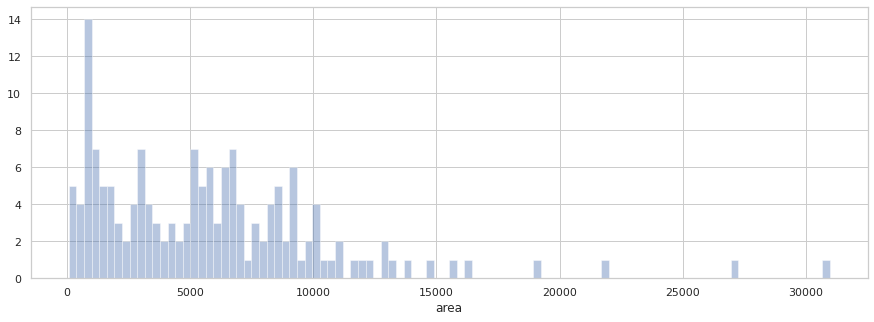

In [26]:
sns.set(style = 'whitegrid')
ax = sns.distplot(set_1.area, bins = 100, kde = False )
ax.figure.set_size_inches(15,5)

o arquivo original que foi importado apresenta todos os seus valores como string, e não como float. 
é preciso convertê-los

8.0


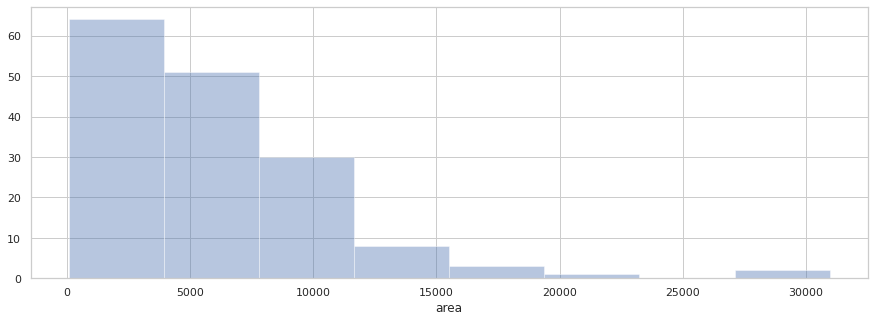

In [27]:
#numero de bins --> usar a regra de sturges
k = (1 + 10/3 *np.log10(len(set_1))).round(0)
print(k)
ax = sns.distplot(set_1.area, bins = 8, kde = False)
ax.figure.set_size_inches(15,5)
ax

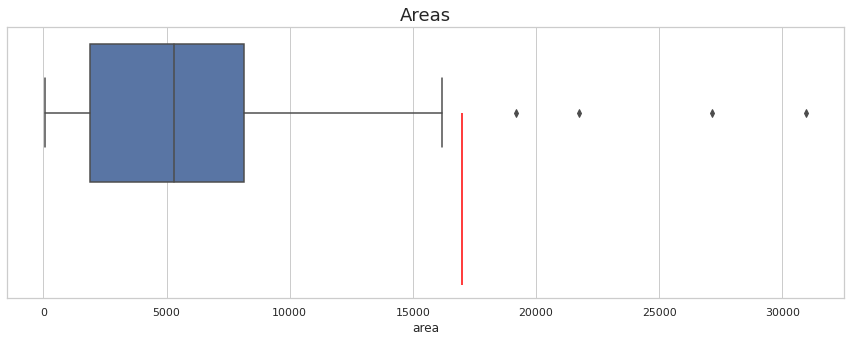

In [28]:
#set_1.boxplot('area')
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(x=set_1["area"])
ax.figure.set_size_inches(15,5)
ax.set_title('Areas', fontsize = 18)
ax.vlines(x = 17000, ymin = 0, ymax = 1, colors='red')

Para facilitar a remoção dos outliers, usar os quantis para tirar os que estão acima do boxplot

Com o boxplot, ele permite remover esses dados discrepantes que não se encontram dentro dos outliers. 

o threshold seria 17000 para essa amostra e haveriam 4 pontos removidos.

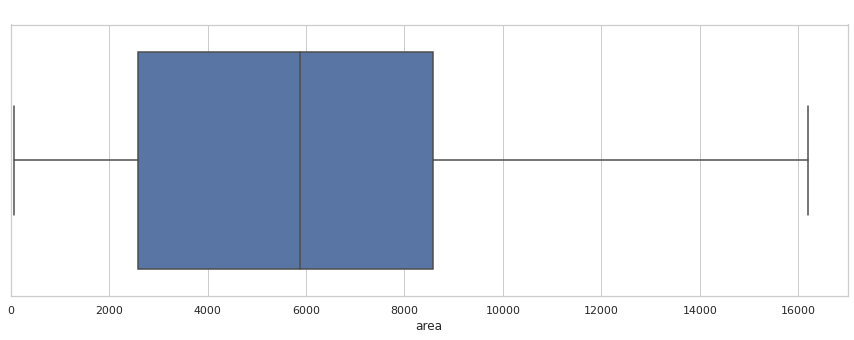

In [0]:
plot_boxplot('area', set_1, 'area_teste')

In [0]:
set_1_area_outliers = set_1.query('area > 17000')
set_1_area_outliers

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
16,17.0,17.0,30963.0,913.6367,322.2773,149.6843,198.5531,set_1
52,53.0,53.0,27146.0,918.7666,239.9542,183.0300,185.9122,set_1
135,136.0,136.0,21726.0,813.8255,203.1576,179.6732,166.3202,set_1
138,139.0,139.0,19185.0,681.6539,195.1114,133.9945,156.2917,set_1


In [0]:
outliers_, frame_limpo_ = limpeza( set_1, 'area')

In [71]:
outliers_

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
16,17.0,17.0,30963.0,913.6367,322.2773,149.6843,198.5531,set_1
52,53.0,53.0,27146.0,918.7666,239.9542,183.0300,185.9122,set_1
135,136.0,136.0,21726.0,813.8255,203.1576,179.6732,166.3202,set_1
138,139.0,139.0,19185.0,681.6539,195.1114,133.9945,156.2917,set_1


In [0]:
set_1.drop(axis = 0, index = [16,52,135,138], inplace = True)
set_1[130:140]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
133,134.0,134.0,6258.0,349.2031,114.0272,78.3268,89.2633,set_1
134,135.0,135.0,8713.0,366.6762,120.7077,93.9964,105.3268,set_1
136,137.0,137.0,5851.0,299.0366,96.8065,77.6033,86.3118,set_1
137,138.0,138.0,9325.0,400.4752,137.3738,93.5164,108.9631,set_1
139,140.0,140.0,826.0,108.1838,35.6632,29.8994,32.4299,set_1
140,141.0,141.0,2086.0,193.7817,67.8672,41.5475,51.5362,set_1
141,142.0,142.0,6703.0,316.5097,97.6478,89.3245,92.3825,set_1
142,143.0,143.0,2568.0,200.6102,70.6478,47.6501,57.1811,set_1
143,144.0,144.0,8820.0,369.6051,124.8781,92.8132,105.9716,set_1
144,145.0,145.0,3110.0,227.1371,75.3021,56.9255,62.9267,set_1


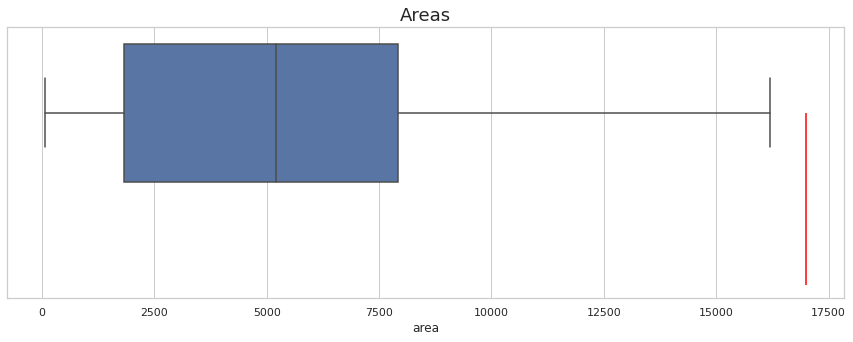

In [0]:
sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
ax = sns.boxplot(x=set_1["area"])
ax.figure.set_size_inches(15,5)
ax.set_title('Areas', fontsize = 18)
ax.vlines(x = 17000, ymin = 0, ymax = 1, colors='red')

8


Text(0.5, 1.0, 'Areas - histograma')

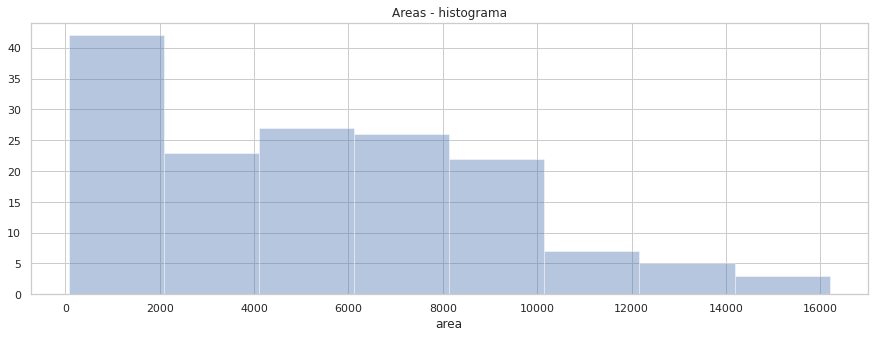

In [0]:
k = int((1 + 10/3 *np.log10(len(set_1))).round(0))
print(k)
sns.set(style="whitegrid")
ax = sns.distplot(a = set_1.area, bins = k, kde = False)
ax.figure.set_size_inches(15,5)
ax.set_title('Areas - histograma')

#### area com função

In [80]:
outlier_1_area
#set_1

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033,set_1
16,17.0,17.0,30963.0,913.6367,322.2773,149.6843,198.5531,set_1
52,53.0,53.0,27146.0,918.7666,239.9542,183.0300,185.9122,set_1
135,136.0,136.0,21726.0,813.8255,203.1576,179.6732,166.3202,set_1
138,139.0,139.0,19185.0,681.6539,195.1114,133.9945,156.2917,set_1


In [79]:
set_1[10:20]

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
11,12.0,12.0,4815.0,294.1665,106.6351,61.3767,78.2985,set_1
12,13.0,13.0,6510.0,314.1665,98.2614,86.1987,91.0428,set_1
13,14.0,14.0,7884.0,336.7351,101.4844,99.9200,100.1909,set_1
14,15.0,15.0,1707.0,168.2254,49.7539,46463.0000,46.6200,set_1
15,16.0,16.0,707.0,111.2904,34.8355,28.1487,30003.0000,set_1
17,18.0,18.0,9774.0,383061.0000,124.8502,101.1178,111.5556,set_1
18,19.0,19.0,6318.0,325.8061,97843.0000,86.7009,89.6902,set_1
19,20.0,20.0,6264.0,305865.0000,98.5396,82.4586,89.3061,set_1
20,21.0,21.0,5462.0,295.4214,102.8607,68.8796,83.3933,set_1
21,22.0,22.0,6483.0,312.6934,102.3497,81.7811,90.8538,set_1


#### Perimeter

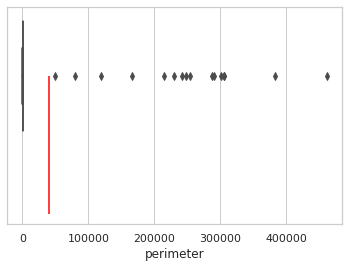

In [0]:
#boxplot
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = 'perimeter', data = set_1)
ax.vlines(x = 40000, ymin = 0, ymax = 1, colors='red')

In [0]:
#threshold and outliers eliminations
threshold = 40000
set_1_perimeter_outliers = set_1.query('perimeter > 40000')
list_outliers_perimeters = set_1_perimeter_outliers.index
type(list_outliers_perimeters)


pandas.core.indexes.numeric.Int64Index

In [0]:
#use threshold to drop values
set_1.drop(axis=0, index = list_outliers_perimeters, inplace = True)
set_1

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
1,2.0,2.0,2220.0,236.2254,85772.0000,40.4931,53.1657,set_1
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803,set_1
3,4.0,4.0,1262.0,136.1838,46123.0000,35.7796,40.0853,set_1
5,6.0,6.0,995.0,117.9411,43.0737,29.6965,35.5932,set_1
6,7.0,7.0,12768.0,479.8305,163786.0000,104.6226,127.5019,set_1
...,...,...,...,...,...,...,...,...
155,156.0,156.0,961.0,114.9117,36.5504,33.8685,34.9798,set_1
156,157.0,157.0,12187.0,442.4802,146.5051,110.0996,124.5671,set_1
157,158.0,158.0,7188.0,348.4508,112.9879,87.1733,95.6663,set_1
158,159.0,159.0,9047.0,364.9777,118.8642,97.8636,107.3266,set_1


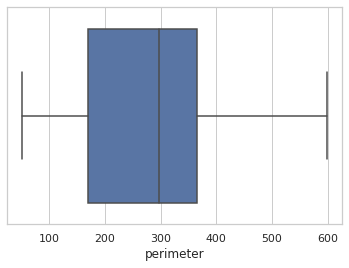

In [0]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = 'perimeter', data = set_1)
#ax.vlines(x = 40000, ymin = 0, ymax = 1, colors='red')

observa-se que os resultados obtidos estão todos abaixo do threshold de 40000 estaeleido previamente

8


Text(0.5, 1.0, 'Perimeter - histograma')

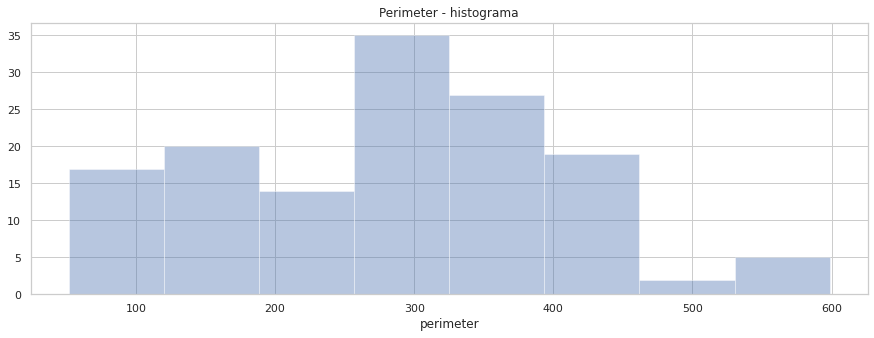

In [0]:
k = int((1 + 10/3 *np.log10(len(set_1))).round(0))
print(k)
sns.set(style="whitegrid")
ax = sns.distplot(a = set_1.perimeter, bins = k, kde = False)
ax.figure.set_size_inches(15,5)
ax.set_title('Perimeter - histograma')

#### major axis

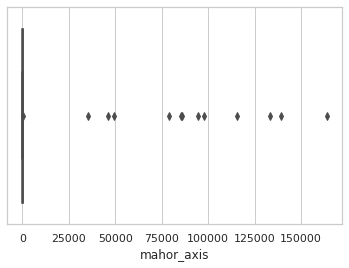

In [0]:
#erifica os valores
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = 'mahor_axis', data = set_1)

In [0]:
#remove os ouliers, threshold = 25000
set_1_major_axis_outliers = set_1.query('mahor_axis > 25000')
list_outliers_major_axis = set_1_major_axis_outliers.index 
list_outliers_major_axis

Int64Index([1, 3, 6, 18, 63, 72, 74, 77, 104, 106, 110, 145], dtype='int64')

In [0]:
set_1.drop(axis = 0, index = list_outliers_major_axis, inplace = True)
set_1

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803,set_1
5,6.0,6.0,995.0,117.9411,43.0737,29.6965,35.5932,set_1
7,8.0,8.0,6722.0,310.7351,101.5184,86.0766,92.5133,set_1
8,9.0,9.0,6694.0,322.5757,105.7522,83.2152,92.3205,set_1
10,11.0,11.0,12826.0,436.5757,139.8589,118.4677,127.7911,set_1
...,...,...,...,...,...,...,...,...
155,156.0,156.0,961.0,114.9117,36.5504,33.8685,34.9798,set_1
156,157.0,157.0,12187.0,442.4802,146.5051,110.0996,124.5671,set_1
157,158.0,158.0,7188.0,348.4508,112.9879,87.1733,95.6663,set_1
158,159.0,159.0,9047.0,364.9777,118.8642,97.8636,107.3266,set_1


Text(0.5, 1.0, 'Major axis - cleansed')

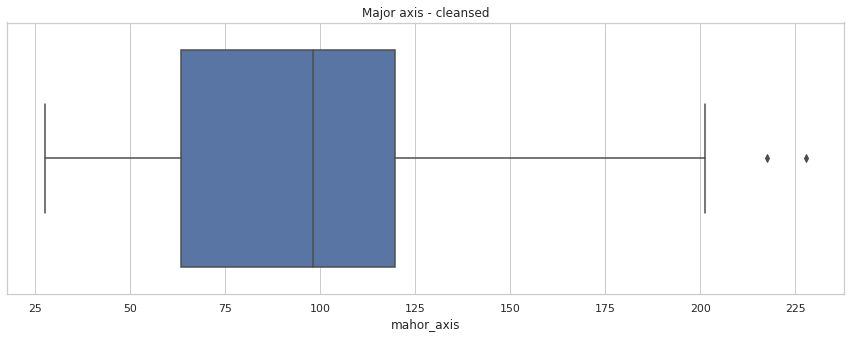

In [0]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = 'mahor_axis', data = set_1)
ax.figure.set_size_inches(15,5)
ax.set_title('Major axis - cleansed')

os valores estão todos abaixo de 25,000, e com isso foi gerado o boxplot acima

8


Text(0.5, 1.0, 'Maor_axis - histograma')

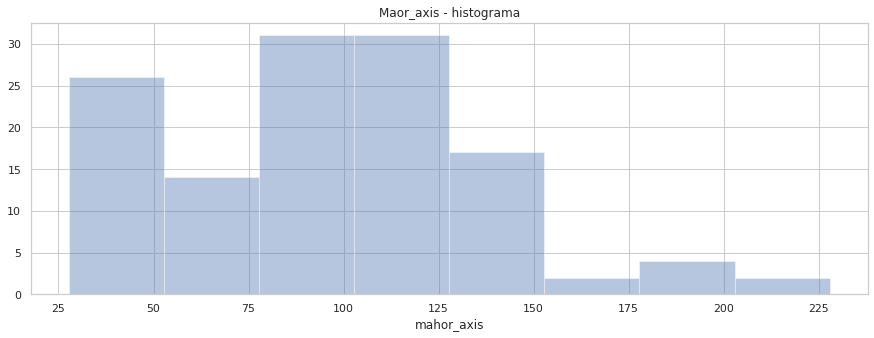

In [0]:
k = int((1 + 10/3 *np.log10(len(set_1))).round(0))
print(k)
sns.set(style="whitegrid")
ax = sns.distplot(a = set_1.mahor_axis, bins = k, kde = False)
ax.figure.set_size_inches(15,5)
ax.set_title('Maor_axis - histograma')

#### minor axis

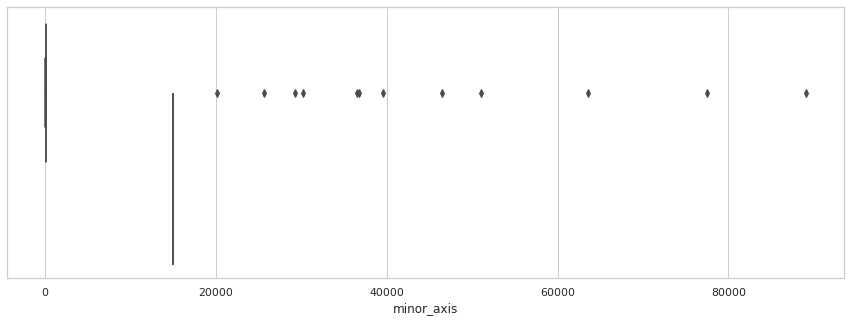

In [0]:
sns.set(style='whitegrid')
ax = sns.boxplot(x = 'minor_axis', data = set_1)
ax.figure.set_size_inches(15,5)
ax.vlines(x = 15000, ymin = 0, ymax=1)

In [0]:
#thresholdde 15000
set_1_minor_axis_outliers = set_1.query('minor_axis > 15000')
list_outliers_minor_axis = set_1_minor_axis_outliers.index
list_outliers_minor_axis

Int64Index([14, 33, 59, 71, 76, 78, 85, 86, 88, 100, 101, 149], dtype='int64')

In [0]:
set_1.drop(axis = 0, index = list_outliers_minor_axis, inplace = True)
set_1

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803,set_1
5,6.0,6.0,995.0,117.9411,43.0737,29.6965,35.5932,set_1
7,8.0,8.0,6722.0,310.7351,101.5184,86.0766,92.5133,set_1
8,9.0,9.0,6694.0,322.5757,105.7522,83.2152,92.3205,set_1
10,11.0,11.0,12826.0,436.5757,139.8589,118.4677,127.7911,set_1
...,...,...,...,...,...,...,...,...
155,156.0,156.0,961.0,114.9117,36.5504,33.8685,34.9798,set_1
156,157.0,157.0,12187.0,442.4802,146.5051,110.0996,124.5671,set_1
157,158.0,158.0,7188.0,348.4508,112.9879,87.1733,95.6663,set_1
158,159.0,159.0,9047.0,364.9777,118.8642,97.8636,107.3266,set_1


Text(0.5, 1.0, 'Minor axis')

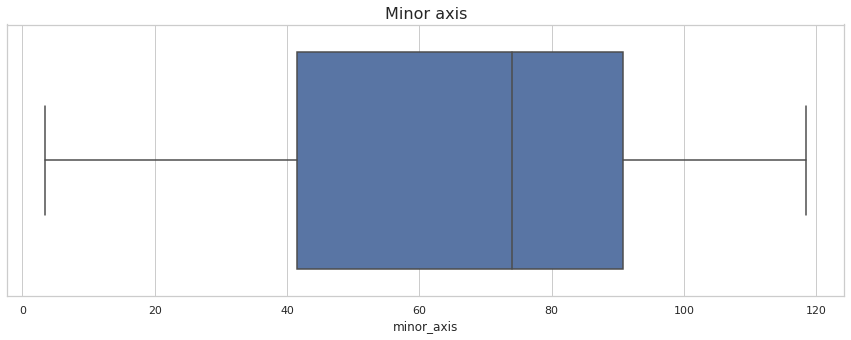

In [0]:
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = 'minor_axis', data = set_1)
ax.figure.set_size_inches(15,5)
ax.set_title('Minor axis', fontsize = 16)

8


Text(0.5, 1.0, 'minor_axis - histograma')

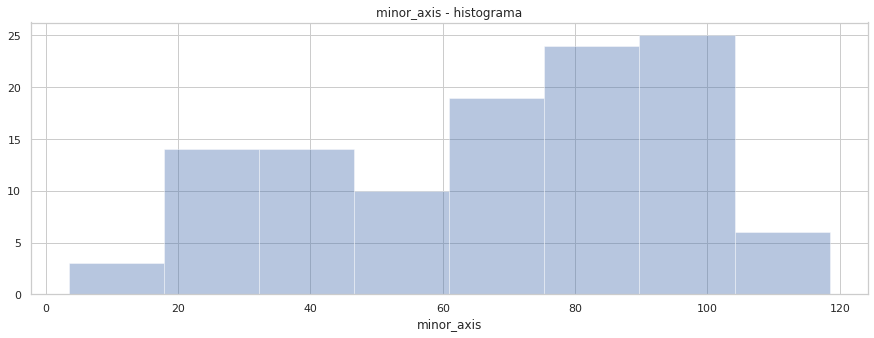

In [0]:
k = int((1 + 10/3 *np.log10(len(set_1))).round(0))
print(k)
sns.set(style="whitegrid")
ax = sns.distplot(a = set_1.minor_axis, bins = k, kde = False)
ax.figure.set_size_inches(15,5)
ax.set_title('minor_axis - histograma')

#### equivalent diameter


Text(0.5, 1.0, 'Equivalent diameter - raw')

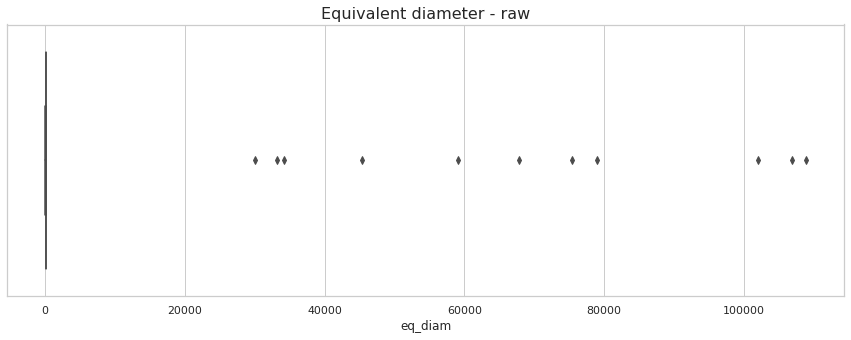

In [0]:
sns.set(style='whitegrid')
ax = sns.boxplot(x = 'eq_diam', data = set_1)
ax.figure.set_size_inches(15,5)
ax.set_title('Equivalent diameter - raw', fontsize = 16)

In [0]:
#threshold  =20000

(0.0, 132870.02685706416)

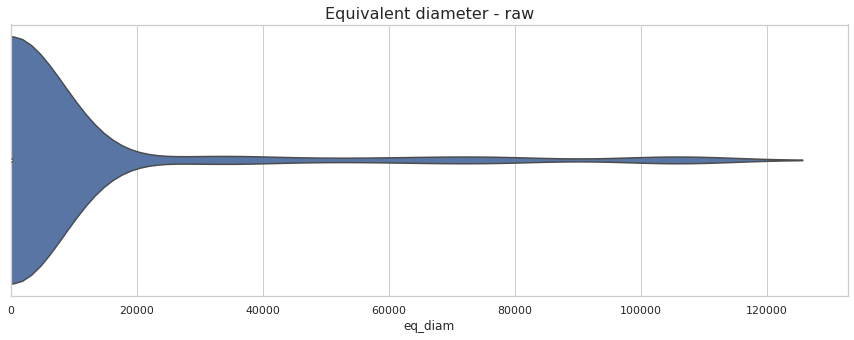

In [0]:
sns.set(style= 'whitegrid')
ax = sns.violinplot(x = 'eq_diam', data = set_1)
ax.figure.set_size_inches(15,5)
ax.set_title('Equivalent diameter - raw', fontsize = 16)
ax.set_xlim(left=0)

In [0]:
count_before = set_1.eq_diam.shape[0]
print(count_before)

115


data cleansing

In [0]:
set_1_eq_diam_outliers = set_1.query('eq_diam > 20000')
list_outliers_eq_diam = set_1_eq_diam_outliers.index
list_outliers_eq_diam
set_1.shape[0]

115

In [0]:
set_1.drop(index = list_outliers_eq_diam, inplace = True)
set_1.shape[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


104

In [0]:
1-104/115

0.09565217391304348

Text(0.5, 1.0, 'Equivalent diameter - cleansed')

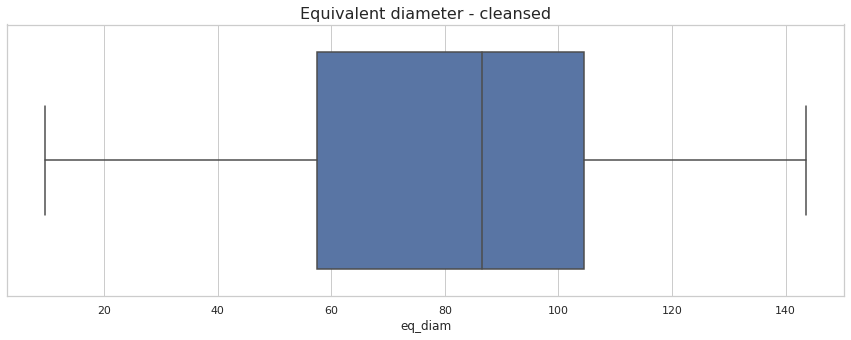

In [0]:
sns.set(style='whitegrid')
ax = sns.boxplot(x = 'eq_diam', data = set_1)
ax.figure.set_size_inches(15,5)
ax.set_title('Equivalent diameter - cleansed', fontsize = 16)

(0.0, 177.40328213247193)

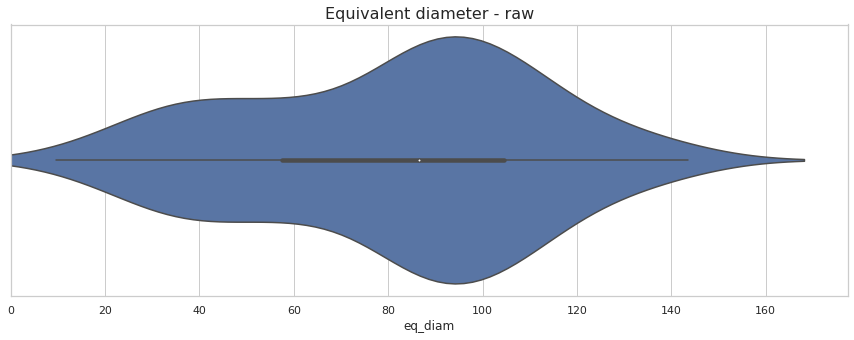

In [0]:
sns.set(style='whitegrid')
ax = sns.violinplot(x = 'eq_diam', data = set_1)
ax.figure.set_size_inches(15,5)
ax.set_title('Equivalent diameter - raw', fontsize = 16)
ax.set_xlim(left = 0)

observa-se com o violinplot que há 2 picos distintos, um em torno de 40 e outro em torno de 90

### limpeza do frame com uso de funçao

Area

In [0]:
outlier_1_area, set_1 = limpeza(set_1, 'area')

In [82]:
outlier_1_area

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033,set_1
16,17.0,17.0,30963.0,913.6367,322.2773,149.6843,198.5531,set_1
52,53.0,53.0,27146.0,918.7666,239.9542,183.0300,185.9122,set_1
135,136.0,136.0,21726.0,813.8255,203.1576,179.6732,166.3202,set_1
138,139.0,139.0,19185.0,681.6539,195.1114,133.9945,156.2917,set_1


In [84]:
set_1[10:20]

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
11,12.0,12.0,4815.0,294.1665,106.6351,61.3767,78.2985,set_1
12,13.0,13.0,6510.0,314.1665,98.2614,86.1987,91.0428,set_1
13,14.0,14.0,7884.0,336.7351,101.4844,99.9200,100.1909,set_1
14,15.0,15.0,1707.0,168.2254,49.7539,46463.0000,46.6200,set_1
15,16.0,16.0,707.0,111.2904,34.8355,28.1487,30003.0000,set_1
17,18.0,18.0,9774.0,383061.0000,124.8502,101.1178,111.5556,set_1
18,19.0,19.0,6318.0,325.8061,97843.0000,86.7009,89.6902,set_1
19,20.0,20.0,6264.0,305865.0000,98.5396,82.4586,89.3061,set_1
20,21.0,21.0,5462.0,295.4214,102.8607,68.8796,83.3933,set_1
21,22.0,22.0,6483.0,312.6934,102.3497,81.7811,90.8538,set_1


Perimeter

In [0]:
outlier_1_perimeter, set_1 = limpeza(set_1, 'perimeter')

In [87]:
outlier_1_perimeter.shape[0]

16

major axis

In [0]:
outlier_1_major_axis, set_1 = limpeza(set_1, 'mahor_axis')

In [90]:
outlier_1_major_axis.shape[0]

13

minor axis

In [0]:
outlier_1_minor_axis, set_1 = limpeza(set_1, 'minor_axis')

In [92]:
outlier_1_minor_axis.shape[0]

12

equivalent diameter


In [0]:
outlier_1_eq_diam, set_1 = limpeza(set_1, 'eq_diam')

In [94]:
outlier_1_eq_diam.shape[0]

11

total de dados removidos do dataframe set_1

In [95]:
total_removido = outlier_1_area.shape[0] + outlier_1_perimeter.shape[0] + outlier_1_major_axis.shape[0] + outlier_1_minor_axis.shape[0] + outlier_1_eq_diam.shape[0] 
total_removido

57

In [0]:
total_raw = 160

In [0]:
aaa = (total_removido / total_raw )

In [102]:
aaa

0.35625

###Descricao individual

####Area 

In [0]:
set_1.area.describe().round(2)

count      104.00
mean      5914.82
std       3827.02
min         73.00
25%       2595.00
50%       5883.50
75%       8579.75
max      16199.00
Name: area, dtype: float64

(0.0, 17005.3)

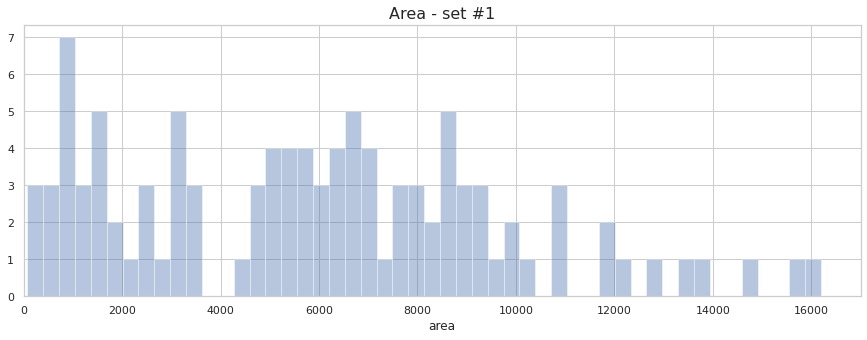

In [0]:
sns.set(style ='whitegrid')
bin = s
ax = sns.distplot(set_1.area, bins =50, kde = False)
ax.figure.set_size_inches(15,5)
ax.set_title('Area - set #1', fontsize = 16)
ax.set_xlim(left = 0)

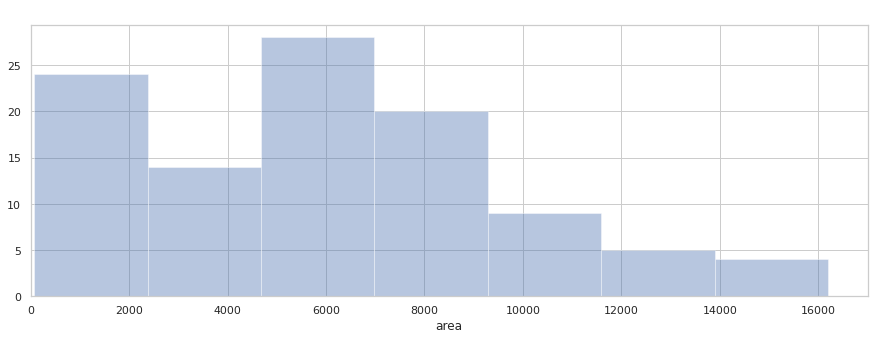

In [0]:
plot_hist(set_1.area, False, 'areaa')

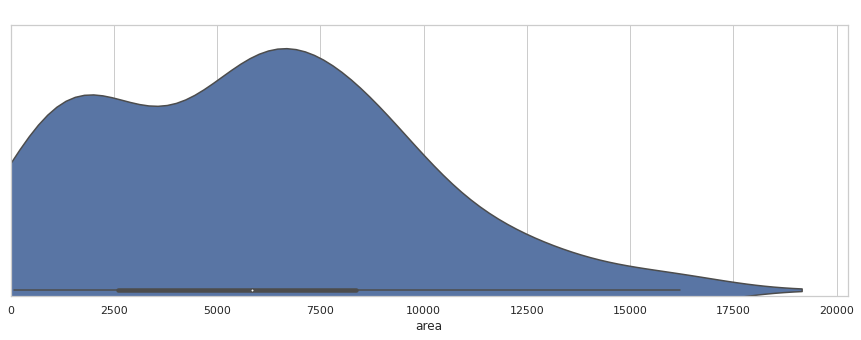

In [107]:
plot_violin('area', set_1, 'areaa')

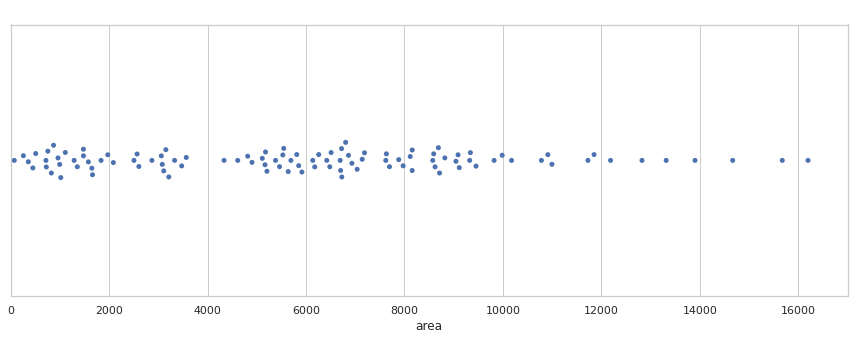

In [0]:
plot_swarm('area', set_1, 'area - swarm')

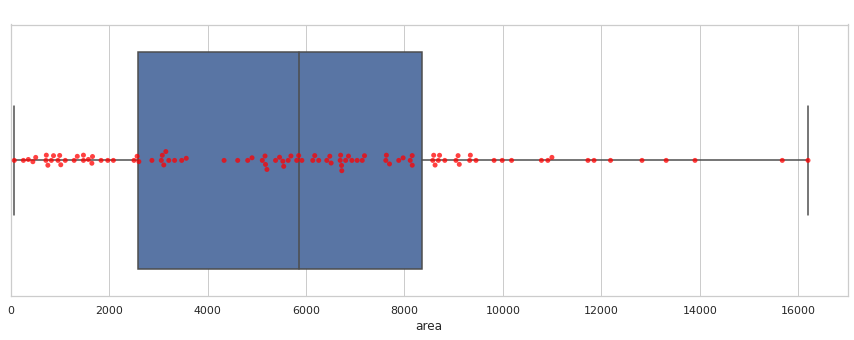

In [113]:
plot_boxplot('area', set_1, 'area')
plot_swarm('area', set_1, 'area')

####Perimetro

####Major Axis

####Minor Axis

####Diametro Equivalente

###Descricao comparativa

####Area x Perimetro
Quais conclusoes sao possiveis de se tirar dessa relacao? 

Comparar com relacoes geometricas

- triangulos
- quadrados
- pentagonos
- hexagonos

####Major e Minor Axis

Como se relacionam essas duas grandezas?

O que significa uma média entre essas duas grandezas? 

É plausivel comparar essas grandezas com alguma figura geometrica?

####Diam Eq x Area

##Set 2

##Set 3

##Set 4

# Comparacao entre os grupos